### 1 SVC

### 1. SVC

The Scikit-learn library provides different kernels for the Support Vector Classifier, e.g. RBF or polynomial.

Based on the examples in the accompanying notebook, create your own SVC class and configure it with different kernels to see if you are able to have it correctly separate the moon-dataset. You can also use a precomputed kernel. In addition, there are several parameters you can tune to for better results. Make sure to go through the documentation.

Hint:

    Plot the support vectors for understanding how it works.
    Give arguments why a certain kernel behaves a certain way.


In [89]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import make_classification
from sklearn.datasets import make_moons
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay 
from sklearn.model_selection import train_test_split

##### Tutorial notebook E_LR_SVM.ipynb

In [90]:
X, y = make_moons(n_samples=200, random_state=0, shuffle=True)

X_train, X_test = X[:100], X[100:]
y_train, y_test = y[:100], y[100:]

In [119]:
lr = LogisticRegression()
svm = SVC()
svm_lin = SVC(kernel='linear')

lr.fit(X_train, y_train)
svm.fit(X_train, y_train)
svm_lin.fit(X_train, y_train)

SVC(kernel='linear')

In [106]:
def make_meshgrid(X, h=.01):
    """Create a mesh grid based on vectors X and Y."""
    if X.shape[1] > 3:
        raise ValueError('Requires a matrix of 2 features for visualization purposes.')
    
    x_min = X.min() - 1
    x_max = X.max() + 1
        
    x = np.arange(x_min, x_max, h)
        
    xx, yy = np.meshgrid(x, x)
    
    return xx, yy

In [120]:

xx, yy = make_meshgrid(X)
grid = np.c_[xx.ravel(), yy.ravel()]

lr_prob = lr.predict_proba(grid)[:, 1].reshape(xx.shape)
svm_pred = svm.predict(grid).reshape(xx.shape)
svm_lin_pred = svm_lin.predict(grid).reshape(xx.shape)

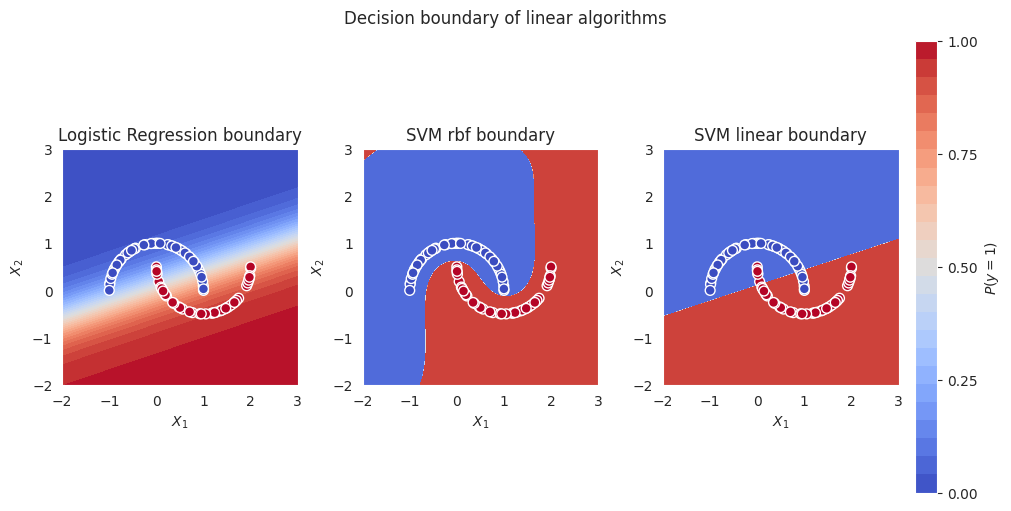

In [123]:

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 5), layout="constrained")

fig.suptitle('Decision boundary of linear algorithms')

# flatten for easier manipulation
axes.ravel()

# logistic regression
contour = axes[2].contourf(xx, yy, lr_prob, 25, cmap=plt.cm.coolwarm)
ax_c = fig.colorbar(contour)
ax_c.set_label('$P(y = 1)$')
ax_c.set_ticks([0, .25, .5, .75, 1])
axes[0].contourf(xx, yy, lr_prob, 35, cmap=plt.cm.coolwarm)
axes[0].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.coolwarm)
axes[0].set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes[0].set_title('Logistic Regression boundary')


# SVM
axes[1].contourf(xx, yy, svm_pred, cmap=plt.cm.coolwarm)
axes[1].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.coolwarm)
axes[1].set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes[1].set_title('SVM rbf boundary')

# linear SVM
axes[2].contourf(xx, yy, svm_lin_pred, cmap=plt.cm.coolwarm)
axes[2].scatter(X_test[:, 0], X_test[:, 1], c=y_test, edgecolor='white', linewidth=1, s=50, cmap=plt.cm.coolwarm)
axes[2].set(aspect='equal',
           xlim=(X.min() - 1, X.max() + 1),
           ylim=(X.min() - 1, X.max() + 1),
           xlabel='$X_1$',
           ylabel='$X_2$')
axes[2].set_title('SVM linear boundary')

plt.show()



##### Different kernels other plot

Code based on Excersise/E_NT_NB.ipynb

In [99]:
def make_classifier_plots(datasets,names, classifiers):
    figure = plt.figure(figsize=(15, 5))
    
    i = 1

    # iterate over datasets
    for ds_count, ds in enumerate(datasets):
        X, y = ds
        
        X_train, X_test, y_train, y_test = train_test_split(
            X, y, test_size=0.4, random_state=0
        )
        
        # determining min point and max point and add margin
        x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
        y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5
        
        # plot dataset
        cm = plt.cm.RdBu
        cm_bright = ListedColormap(['#FF0000', '#0000FF'])
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        # plot original
        if ds_count == 0:
            ax.set_title('Input data')
            
        # plot training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors='k')
        
        # plot testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6, edgecolors="k")
        
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())
        i += 1

        # iterate over classifiers
        for name, clf in zip(names, classifiers):
            ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
            
            # make pipeline to make it easier
            clf = make_pipeline(StandardScaler(), clf)
            clf.fit(X_train, y_train)
            score = clf.score(X_test, y_test)
            DecisionBoundaryDisplay.from_estimator(
                clf, X, cmap=cm, alpha=0.8, ax=ax, eps=0.5
            )
            
            # plot training points
            ax.scatter(
                X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright, edgecolors="k"
            )
            # plot testing points
            ax.scatter(
                X_test[:, 0],
                X_test[:, 1],
                c=y_test,
                cmap=cm_bright,
                edgecolors="k",
                alpha=0.6,
            )
            ax.set_xlim(x_min, x_max)
            ax.set_ylim(y_min, y_max)
            ax.set_xticks(())
            ax.set_yticks(())
            if ds_count == 0:
                ax.set_title(name)
            ax.text(
                x_max - 0.3,
                y_min + 0.3,
                ("%.2f" % score).lstrip("0"),
                size=15,
                horizontalalignment="right",
            )
            i += 1
    plt.tight_layout()
    plt.show()

In [100]:
data = [make_moons(n_samples=200, random_state=0, shuffle=True)]
names= ['LogisticRegression', 'RBF SVC', 'Linear SVC', 'Poly SVC']
classifiers= [LogisticRegression(), SVC(kernel='rbf'), SVC(kernel='linear'), SVC(kernel='poly')]

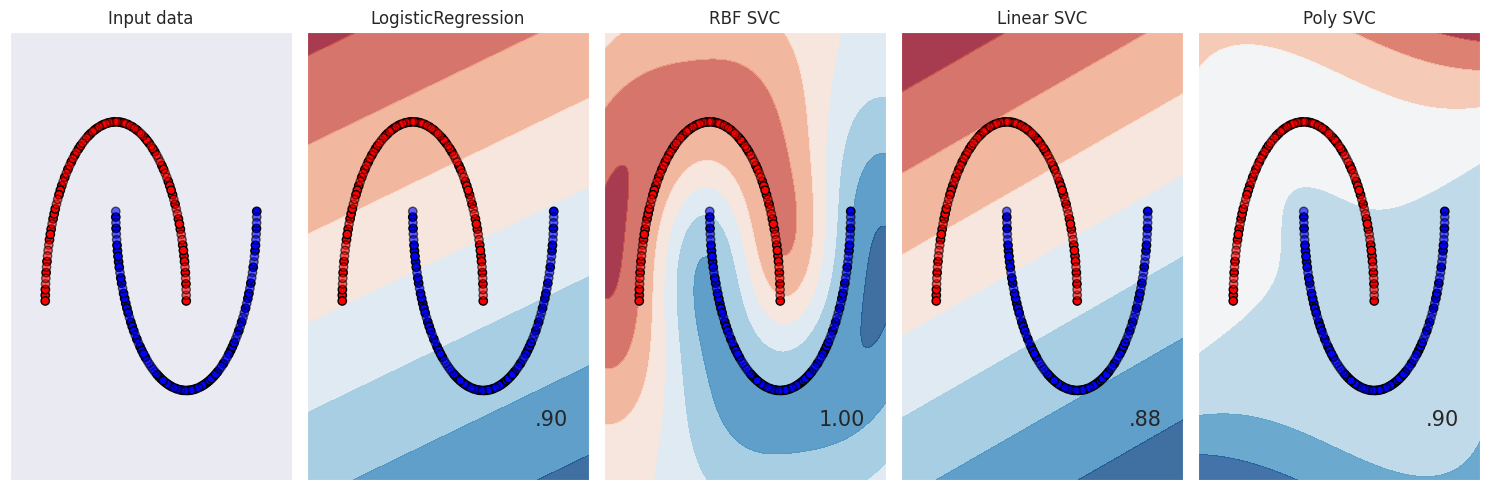

In [101]:
make_classifier_plots(data, names, classifiers)

The rbf kernel seems to give the best score.

### 2. Model Evaluation

Classification metrics are important for measuring the performance of your model. Scikit-learn provides several options such as the classification_report and confusion_matrix functions. Another helpful option is the AUC ROC and precision-recall curve. Try to understand what these metrics mean and give arguments why one metric would be more important then others.

For instance, if you have to predict whether a patient has cancer or not, the number of false negatives is probably more important than the number of false positives. This would be different if we were predicting whether a picture contains a cat or a dog – or not: it all depends on the context. Thus, it is important to understand when to use which metric.

For this exercise, you can use your own dataset if that is eligable for supervised classification. Otherwise, you can use the breast cancer dataset which you can find on assemblix2019 (/data/datasets/DS3/). Go through the data science pipeline as you've done before:

    Try to understand the dataset globally.
    Load the data.
    Exploratory analysis
    Preprocess data (skewness, normality, etc.)
    Modeling (cross-validation and training)
    Evaluation

Create and train several LogisticRegression and SVM models with different values for their hyperparameters. Make use of the model evaluation techniques that have been described during the plenary part to determine the best model for this dataset. Accompany you elaborations with a conclusion, in which you explicitely interpret these evaluation and describe why the different metrics you are using are important or not. Make sure you take the context of this dataset into account.

In [12]:
import yaml
import pandas as pd

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

### The dataset
The data can be downloaded here: https://www.kaggle.com/uciml/breast-cancer-wisconsin-data/data. <br>
This dataset contains samples that are diagnosed with breast cancer (malignant samples) and samples that are healthy (benign samples).

#### Loading and preprocessing

In [13]:
with open("config.yaml", 'r') as stream:
    config = yaml.safe_load(stream)
    data = pd.read_csv(config['cancer'])

In [14]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [16]:
set(data.diagnosis)

{'B', 'M'}

In [17]:
#Check the counts
data['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [18]:
# Check the total number of missing values
f"The total number of missing values are {data.isnull().sum().sum()}"

'The total number of missing values are 0'

In [19]:
# Histograms of all features to inspect data distribution
# for col in data:
#     if col =='diagnosis' or col== 'id':
#         continue
#     plt.figure(figsize=(2,2))
#     sns.histplot(x=col, data=data, hue='diagnosis')
#     plt.show()

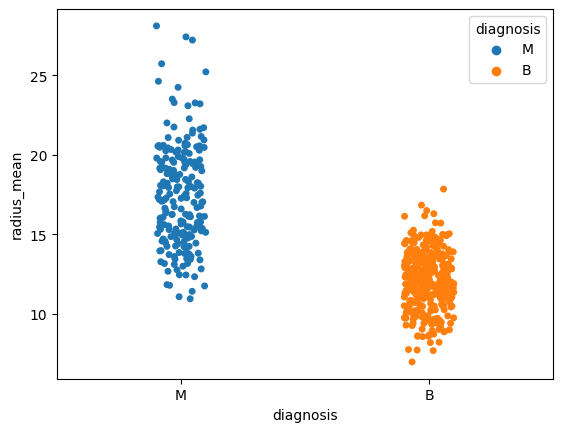

In [20]:
sns.stripplot(y='radius_mean', x='diagnosis', data=data, hue='diagnosis')
plt.show()

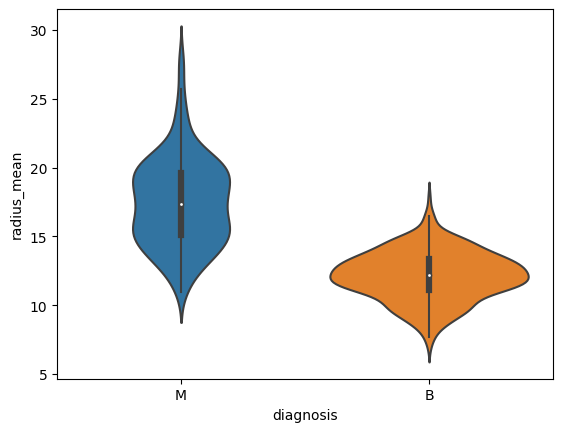

In [21]:
sns.violinplot(y='radius_mean', x='diagnosis', data=data)
plt.show()

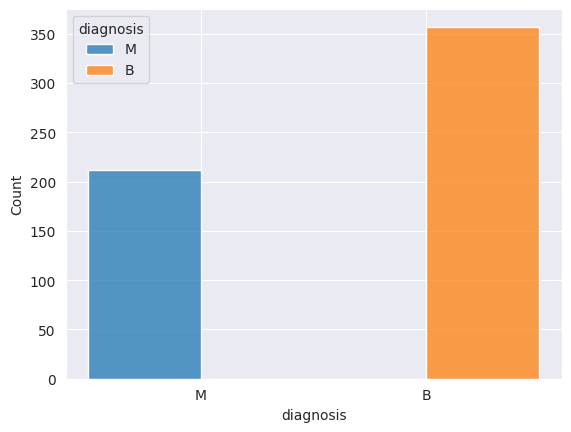

In [22]:
sns.set_style('darkgrid')
sns.histplot(data, x='diagnosis', hue='diagnosis', multiple='dodge', bins=2)
plt.show()

The diagnosis which is M (malignant) or B (benign). This feature should be changed to B = 0 and M = 1. The id feature holds no information and can be removed.

In [23]:
# Cleaning the data
data = data.drop('id',axis=1)
# Changing Benign to 0 and Malignant to 1 
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

__Correlation__ <br>

In [24]:
corr_mat = data.corr().abs()
# Strip out the diagonal values for the next step
for x in range(len(data.columns)):
    corr_mat.iloc[x,x] = 0.0
    
corr_mat

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,0.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,0.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,0.000000,0.329533,0.321086,0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,0.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,0.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,0.023389,0.207278,0.177028,0.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,0.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,0.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,0.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,0.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


<Axes: >

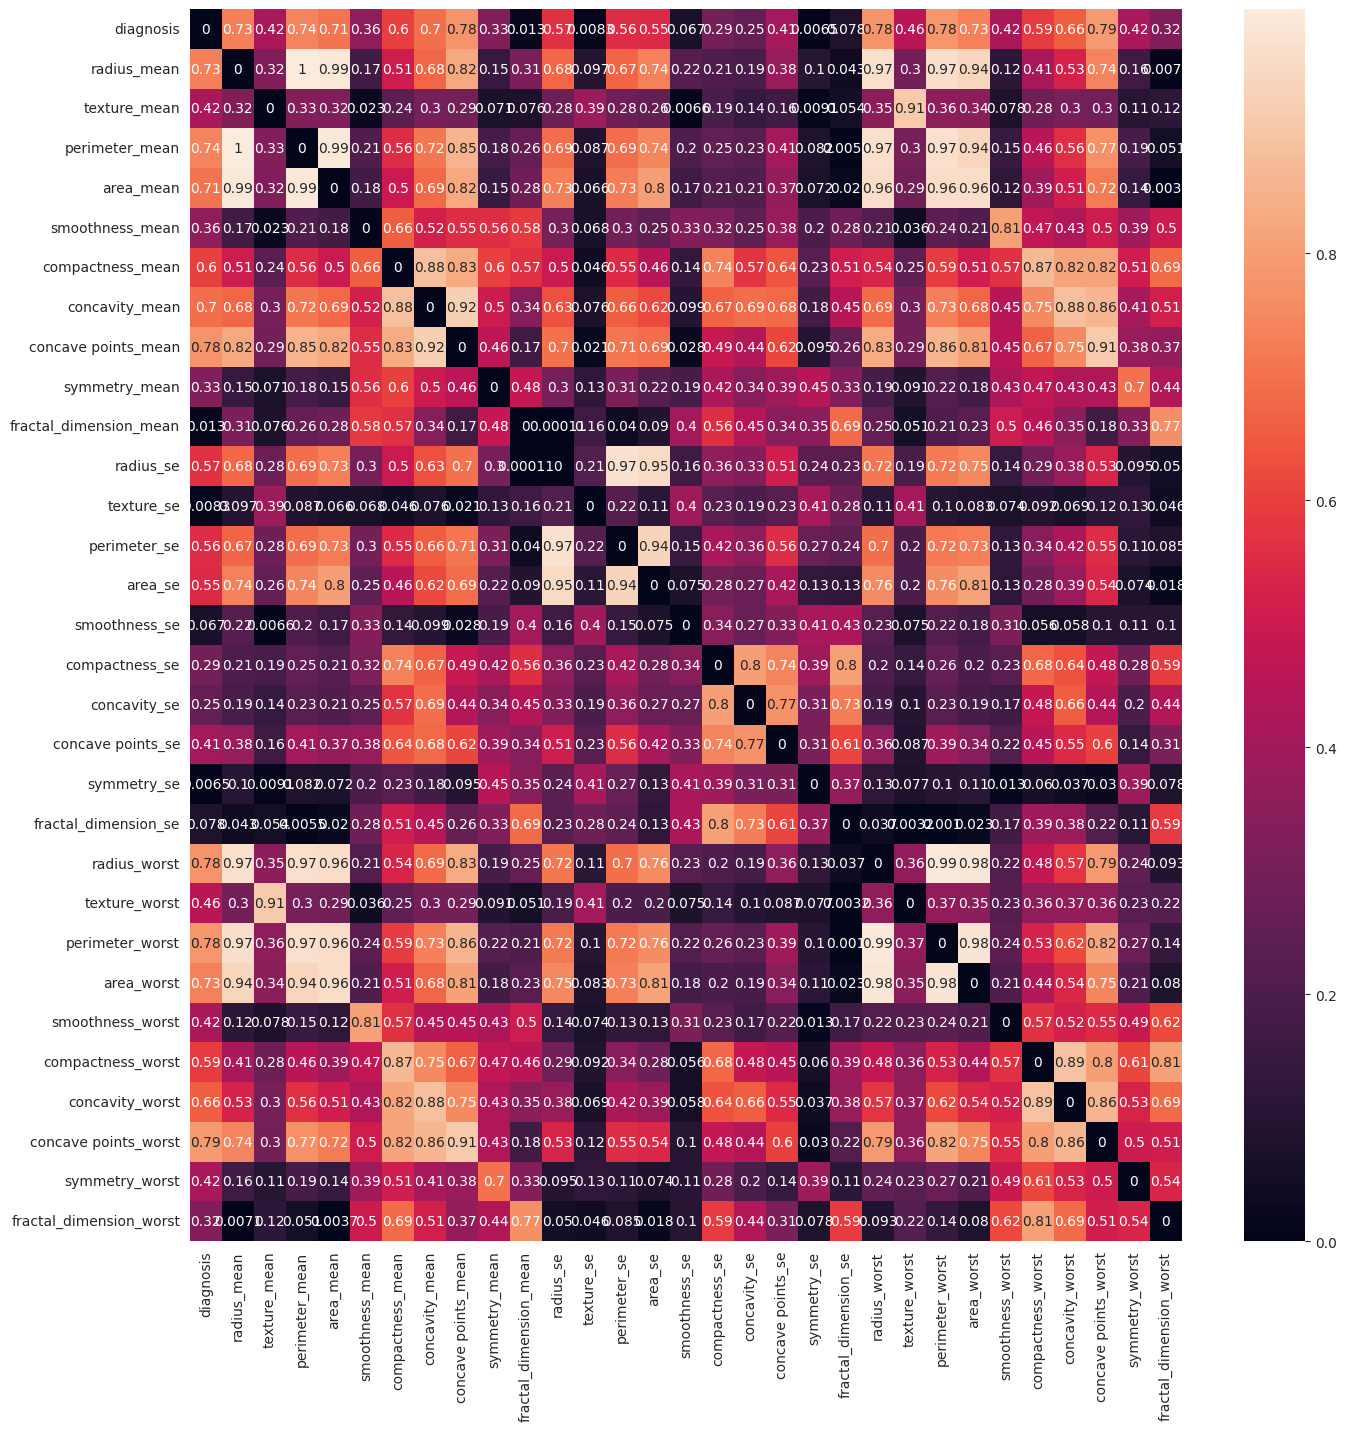

In [25]:
#plot heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr_mat, annot=True)

There seem to be forming correlation 'groups' for certain features. Also, some features with high correlation scores. Correlated features will not always worsen your model, but they will not always improve it either. We will proceed without deleting columns.

In [26]:
# see with features are highly correlated
corr_mat.idxmax()

diagnosis                     concave points_worst
radius_mean                         perimeter_mean
texture_mean                         texture_worst
perimeter_mean                         radius_mean
area_mean                              radius_mean
smoothness_mean                   smoothness_worst
compactness_mean                    concavity_mean
concavity_mean                 concave points_mean
concave points_mean                 concavity_mean
symmetry_mean                       symmetry_worst
fractal_dimension_mean     fractal_dimension_worst
radius_se                             perimeter_se
texture_se                             symmetry_se
perimeter_se                             radius_se
area_se                                  radius_se
smoothness_se                 fractal_dimension_se
compactness_se                fractal_dimension_se
concavity_se                        compactness_se
concave points_se                     concavity_se
symmetry_se                    

In [27]:
#how much are they correlated?
corr_mat.max().sort_values(ascending=False)

perimeter_mean             0.997855
radius_mean                0.997855
perimeter_worst            0.993708
radius_worst               0.993708
area_mean                  0.987357
area_worst                 0.984015
radius_se                  0.972794
perimeter_se               0.972794
area_se                    0.951830
concavity_mean             0.921391
concave points_mean        0.921391
texture_worst              0.912045
texture_mean               0.912045
concave points_worst       0.910155
compactness_worst          0.892261
concavity_worst            0.892261
compactness_mean           0.883121
fractal_dimension_worst    0.810455
smoothness_worst           0.805324
smoothness_mean            0.805324
compactness_se             0.803269
fractal_dimension_se       0.803269
concavity_se               0.801268
diagnosis                  0.793566
concave points_se          0.771804
fractal_dimension_mean     0.767297
symmetry_mean              0.699826
symmetry_worst             0

Many features are correlated, it might be that reducing features  will perform better

In [28]:
# Check if the dat is skewed
# .skew 0: no skew, + right skew, - left skew, look for above .75 
skew_columns = (data
                .skew()
                .sort_values(ascending=False))

skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns

area_se                    5.447186
concavity_se               5.110463
fractal_dimension_se       3.923969
perimeter_se               3.443615
radius_se                  3.088612
smoothness_se              2.314450
symmetry_se                2.195133
compactness_se             1.902221
area_worst                 1.859373
fractal_dimension_worst    1.662579
texture_se                 1.646444
area_mean                  1.645732
compactness_worst          1.473555
concave points_se          1.444678
symmetry_worst             1.433928
concavity_mean             1.401180
fractal_dimension_mean     1.304489
compactness_mean           1.190123
concave points_mean        1.171180
concavity_worst            1.150237
perimeter_worst            1.128164
radius_worst               1.103115
perimeter_mean             0.990650
radius_mean                0.942380
dtype: float64

For the preprocessing a pipeline will be created where a logtransform will be implemented on the skewed columns and afterwards a standardscaler will be used on the data.<br>
Columntransformer needs the column names that you want or do not want to transform, so create lists

In [29]:
skew_columns = skew_columns.index.to_list()

In [30]:
rest = list(data.columns.difference(skew_columns))

In [31]:
rest.remove('diagnosis')

In [32]:
col_names = data.columns.values.tolist()
col_names.remove('diagnosis')

In [33]:
# Save the diagnosis seperately
dftest = data['diagnosis']

In [34]:
log_transform = FunctionTransformer(np.log1p)

With a Columntransformer you can apply different transformations to columns (log, identity, drop)

In [35]:
# This column transformer applies a log transform on the skewed columns, drop the remainding columns (in this case diagnosis) 
# and does not do anything to the other columns (passthrough) 
ct = ColumnTransformer(
                       [("log_transform",  log_transform, skew_columns),
                        ("identity", "passthrough", rest)
                       ],
                       remainder = "drop")

In the preprocessing pipeline you apply your transformations and scaler

In [36]:
#Preprocessing pipeline
prep = Pipeline([('transform', ct), ('scaler', StandardScaler())])

In [37]:
# use the pipeline like you would any model
prep_data = prep.fit_transform(data)

In [38]:
prep_data.shape

(569, 30)

In [39]:
prep_data

array([[ 2.29486227e+00,  7.77126899e-01,  9.11939092e-01, ...,
         2.21751501e+00, -2.07333501e+00, -1.35929347e+00],
       [ 1.27254123e+00, -4.58067805e-01, -9.86496469e-02, ...,
         1.39236330e-03, -3.53632408e-01, -3.69203222e-01],
       [ 1.60666140e+00,  2.40449862e-01,  2.96258017e-01, ...,
         9.39684817e-01,  4.56186952e-01, -2.39743838e-02],
       ...,
       [ 6.83286848e-01,  5.54152678e-01,  3.82269989e-02, ...,
        -8.09117071e-01,  2.04557380e+00,  1.37485378e+00],
       [ 1.48506068e+00,  1.37511469e+00,  9.08904876e-01, ...,
         2.13719425e+00,  2.33645719e+00,  2.23792588e+00],
       [-5.92540630e-01, -1.12941866e+00, -3.83586536e-01, ...,
        -8.20069901e-01,  1.22179204e+00,  7.64189567e-01]])

In [40]:
#Store the transformed and data back into a pandas dataframe
df = pd.DataFrame(data=prep_data, columns=col_names)
df.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,2.294862,0.777127,0.911939,2.524796,2.495079,-0.213311,1.157393,1.331346,1.794344,1.939736,...,2.022158,1.764045,1.281628,1.138030,2.296076,1.568466,1.307686,2.217515,-2.073335,-1.359293
1,1.272541,-0.458068,-0.098650,0.554028,0.656899,-0.606471,-0.811055,-0.699560,1.737118,0.292501,...,1.502321,1.706795,1.597721,1.711783,1.087084,-0.826962,-0.375612,0.001392,-0.353632,-0.369203
2,1.606661,0.240450,0.296258,1.158139,1.397258,-0.296660,0.242895,0.830782,1.493444,0.211979,...,1.362620,1.490832,1.509470,1.524183,1.955000,0.942210,0.527407,0.939685,0.456187,-0.023974
3,-0.114440,0.876556,2.053745,0.580904,0.467214,0.692827,4.688576,2.731916,-0.494860,4.813255,...,-0.130272,-0.179580,-0.550424,-0.774335,2.175786,3.283553,3.394275,2.867383,0.253732,0.133984
4,1.612766,0.885864,0.502861,1.517503,1.437110,1.486324,-0.360720,-0.040635,1.346061,-0.395358,...,1.355825,1.326223,1.663405,1.652935,0.729259,0.280372,0.220556,-0.009560,-1.151816,-1.466770


In [41]:
# Add back the  diagnosis column
df = pd.concat([dftest, df], axis=1)
#df['diagnosis'] = df['diagnosis'].astype(str)

In [42]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,2.294862,0.777127,0.911939,2.524796,2.495079,-0.213311,1.157393,1.331346,1.794344,...,2.022158,1.764045,1.281628,1.138030,2.296076,1.568466,1.307686,2.217515,-2.073335,-1.359293
1,1,1.272541,-0.458068,-0.098650,0.554028,0.656899,-0.606471,-0.811055,-0.699560,1.737118,...,1.502321,1.706795,1.597721,1.711783,1.087084,-0.826962,-0.375612,0.001392,-0.353632,-0.369203
2,1,1.606661,0.240450,0.296258,1.158139,1.397258,-0.296660,0.242895,0.830782,1.493444,...,1.362620,1.490832,1.509470,1.524183,1.955000,0.942210,0.527407,0.939685,0.456187,-0.023974
3,1,-0.114440,0.876556,2.053745,0.580904,0.467214,0.692827,4.688576,2.731916,-0.494860,...,-0.130272,-0.179580,-0.550424,-0.774335,2.175786,3.283553,3.394275,2.867383,0.253732,0.133984
4,1,1.612766,0.885864,0.502861,1.517503,1.437110,1.486324,-0.360720,-0.040635,1.346061,...,1.355825,1.326223,1.663405,1.652935,0.729259,0.280372,0.220556,-0.009560,-1.151816,-1.466770


In [43]:
from sklearn.decomposition import PCA
pca = PCA(n_components=10)

#Create a pipeline for pca
pca_pipe = Pipeline([('prep', prep), ('pca', pca)])

#fit the data
principalComponents = pca_pipe.fit_transform(data)

#Dataframe with principal components
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['pc1', 'pc2', 'pc3','pc4','pc5','pc6','pc7','pc8','pc9','pc10'])
principalDf.head()

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10
0,8.868966,2.106808,-1.724845,-3.078419,-1.737628,1.282218,-1.963551,0.082501,0.060663,-0.928887
1,2.475092,-3.754285,-0.306409,-1.273758,0.209008,0.001696,-0.531703,0.409303,-0.068106,0.919012
2,5.946690,-1.102259,-0.397034,-0.961053,-0.536462,0.472856,0.289039,0.100689,-0.231838,0.286613
3,7.008959,9.826030,-3.441256,0.720455,-2.676863,2.850970,-1.022590,1.405371,1.504108,-1.094590
4,4.098661,-1.822076,1.257145,-3.265124,-0.124615,-1.387399,0.529847,0.635878,-0.258472,0.400746


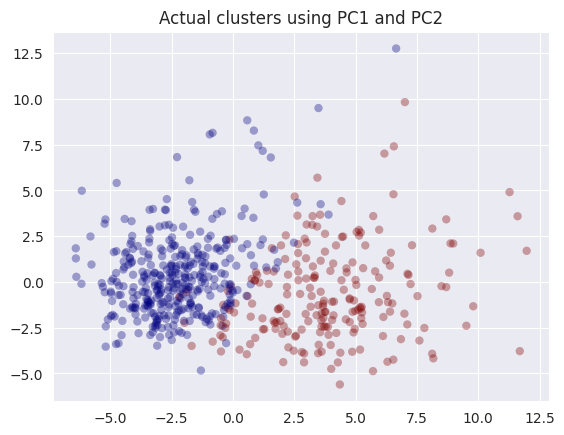

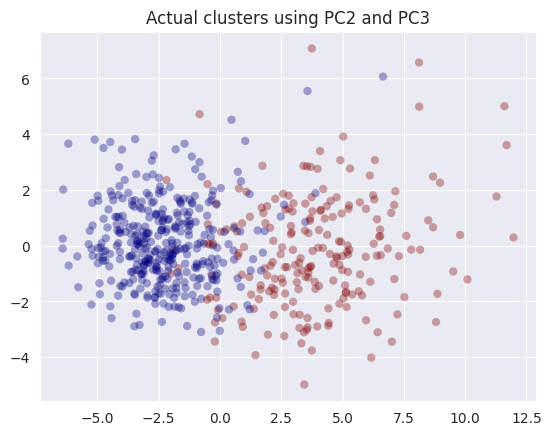

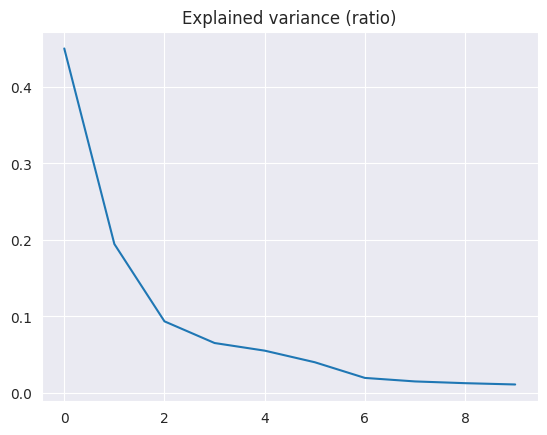

In [44]:
plt.scatter(principalDf['pc1'], principalDf['pc2'],  c = df['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
plt.title('Actual clusters using PC1 and PC2')
plt.show()


plt.scatter(principalDf['pc1'], principalDf['pc3'],  c = df['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
plt.title('Actual clusters using PC2 and PC3')
plt.show()

plt.plot(pca.explained_variance_ratio_)
plt.title('Explained variance (ratio)')
plt.show()


In [45]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1, perplexity=40, n_iter= 4000)

#Create pipeline with tsne
tsne_pipe = Pipeline([('prep', prep), ('tsne', tsne)])

In [46]:
Y = tsne_pipe.fit_transform(data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 569 samples in 0.001s...
[t-SNE] Computed neighbors for 569 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 569 / 569
[t-SNE] Mean sigma: 1.614685


[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.139183
[t-SNE] KL divergence after 1750 iterations: 0.873430


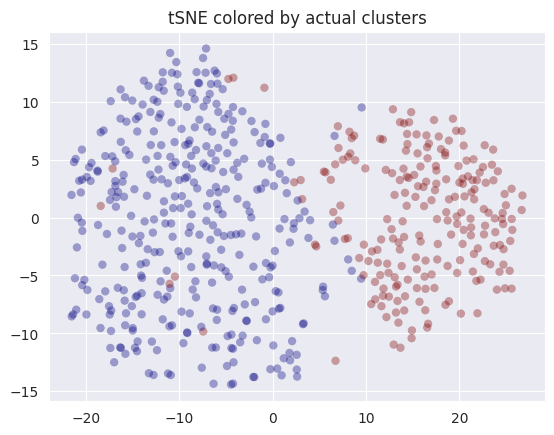

In [47]:
plt.scatter(Y[:,0],Y[:,1],  c = df['diagnosis'], cmap = "jet", edgecolor = "None", alpha=0.35)
plt.title('tSNE colored by actual clusters')
plt.show()



***
### Modeling:

##### SVM training and hyperparameter search

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, validation_curve

In [49]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,2.294862,0.777127,0.911939,2.524796,2.495079,-0.213311,1.157393,1.331346,1.794344,...,2.022158,1.764045,1.281628,1.138030,2.296076,1.568466,1.307686,2.217515,-2.073335,-1.359293
1,1,1.272541,-0.458068,-0.098650,0.554028,0.656899,-0.606471,-0.811055,-0.699560,1.737118,...,1.502321,1.706795,1.597721,1.711783,1.087084,-0.826962,-0.375612,0.001392,-0.353632,-0.369203
2,1,1.606661,0.240450,0.296258,1.158139,1.397258,-0.296660,0.242895,0.830782,1.493444,...,1.362620,1.490832,1.509470,1.524183,1.955000,0.942210,0.527407,0.939685,0.456187,-0.023974
3,1,-0.114440,0.876556,2.053745,0.580904,0.467214,0.692827,4.688576,2.731916,-0.494860,...,-0.130272,-0.179580,-0.550424,-0.774335,2.175786,3.283553,3.394275,2.867383,0.253732,0.133984
4,1,1.612766,0.885864,0.502861,1.517503,1.437110,1.486324,-0.360720,-0.040635,1.346061,...,1.355825,1.326223,1.663405,1.652935,0.729259,0.280372,0.220556,-0.009560,-1.151816,-1.466770


In [50]:
#Split the data into train and test data
X = df[df.columns.difference(['diagnosis'])]
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [51]:
print(f'Total amount of samples in dataset is {len(df.diagnosis)}')
print(f'The training data set has {len(X_train)} samples')
print(f'The test dataset has {len(X_test)} samples')

Total amount of samples in dataset is 569
The training data set has 455 samples
The test dataset has 114 samples


In [52]:
svc = SVC()
param_svc = svc.get_params()

In [53]:
param_svc_df = pd.DataFrame(param_svc, index=['value'])
param_svc_df

,C,break_ties,cache_size,class_weight,coef0,decision_function_shape,degree,gamma,kernel,max_iter,probability,random_state,shrinking,tol,verbose
value,1.0,False,200,None,0.0,ovr,3,scale,rbf,-1,False,None,True,0.001,False


In [54]:
svc.fit(X_train, y_train)
print(f'acuracy score SVM model default parameters is: {svc.score(X_test, y_test):.4f}')

acuracy score SVM model default parameters is: 0.9825


In [55]:
np.logspace(-2, 3, 6)

array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

- In SVC, C is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly. Increasing C values may lead to overfitting the training data.
- gamma is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set. Increasing the gamma value can also leading to overfittin of the training data.

In [56]:
param_grid_svc = {'C': np.logspace(-2,3, 6),
              'gamma': [0.1, 1.0, 10.0, 100.0,'scale', 'auto'],
              'kernel': ['poly', 'rbf', 'linear'],
              'degree': [2, 3, 4, 5]}

In [57]:
scoring='accuracy'
grid_search_svc = GridSearchCV(estimator=svc, param_grid=param_grid_svc, scoring=scoring, cv=5, n_jobs=-1, verbose=0)

In [58]:
grid_result_svc = grid_search_svc.fit(X_train, y_train)

In [59]:
print(f'Best hyperparameters are: {grid_result_svc.best_params_}')
print(f'Best accuracy score for training dataset is: {grid_result_svc.best_score_:.4f}')

Best hyperparameters are: {'C': 1.0, 'degree': 2, 'gamma': 'auto', 'kernel': 'rbf'}
Best accuracy score for training dataset is: 0.9824


In [60]:
best_model = grid_result_svc.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f'Accuracy score test dataset is: {test_score:.4f}')
#print(f'Accuracy score: {grid_search_svc.score(X_test, y_test):.4f}')

Accuracy score test dataset is: 0.9825


Train for optimal parameter

In [61]:
svc_tuned = SVC(C=0.1, degree=2, gamma=0.1, kernel='linear')
svc_tuned.fit(X_train, y_train)
print(f'acuracy score SVM model tuned parameters is: {svc_tuned.score(X_test, y_test):.4f}')

acuracy score SVM model tuned parameters is: 0.9737


In [62]:
svc_tuned = SVC(C=1.0, degree=2, gamma=0.1, kernel='linear')
svc_tuned.fit(X_train, y_train)
print(f'acuracy score SVM model tuned parameters is: {svc_tuned.score(X_test, y_test):.4f}')

acuracy score SVM model tuned parameters is: 0.9649


Interestingly the accuracy score with tuned parameters on the test dataset is slightly worse than on the training dataset. <br>
Changing parameter C from 0.1 to 1.0 does not seem to change the score

In [63]:
from sklearn.model_selection import cross_validate

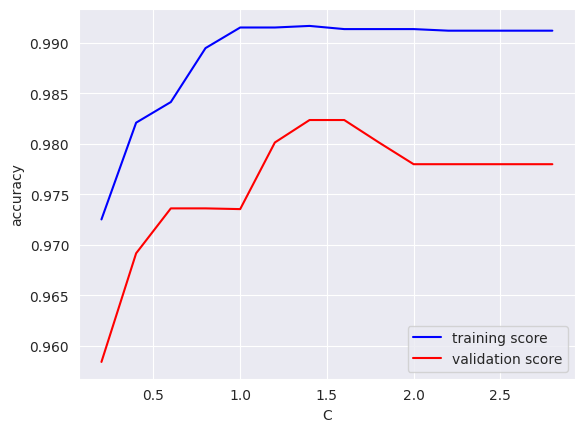

In [64]:
#Create a validation curve
prange = np.arange(-0,3, 0.2)
trainscore, valscore = validation_curve(svc, X_train, y_train, param_name='C', param_range=prange, cv=15, scoring='accuracy')
plt.plot(prange, np.mean(trainscore, 1), color='blue', label='training score')
plt.plot(prange, np.mean(valscore, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('C')
plt.ylabel('accuracy')
plt.show()

The best validation score seems to be 1.5 for parameter C according to the curve

From tutorial_Clustering_Methods.ipynb: <br>
It uses StratifiedShuffleSplit with 10 splits, fit 10 SVC's and find the mean of the ROC-AUC scores from these 10 classifiers.<br>
It gives the average roc-auc scores

In [65]:
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit

def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    # loop to 10 batches
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predicted = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))
    return np.mean(roc_auc_list)

In [66]:
estimator = SVC(probability=True)
sss = StratifiedShuffleSplit(n_splits=10, random_state=6532)

roc = get_avg_roc_10splits(estimator, X, y)
print(roc)

0.994047619047619


In [67]:
y_predicted = estimator.predict(X_test)
y_scored = estimator.predict_proba(X_test)[:,1]
print(roc_auc_score(y_test, y_scored))

0.9978125


Calculating these scores here was a check, because later in the ROCcurvedisplay all scores seem to be 0.99. 

***

### Linear Regression parameter tuning

In [69]:
lr = LogisticRegression()
param_lr = lr.get_params()

In [70]:
lr.fit(X_train, y_train)
print(f'acuracy score Linearregression model default parameters is: {lr.score(X_test, y_test):.4f}')

acuracy score Linearregression model default parameters is: 0.9649


In [71]:
#check possible parameters
param_lr_df = pd.DataFrame(param_lr, index=['value'])
param_lr_df

,C,class_weight,dual,fit_intercept,intercept_scaling,l1_ratio,max_iter,multi_class,n_jobs,penalty,random_state,solver,tol,verbose,warm_start
value,1.0,None,False,True,1,None,100,auto,None,l2,None,lbfgs,0.0001,0,False


In [72]:
#Check for the roc_auc score in different ways
print(roc_auc_score(y_test, lr.predict_proba(X_test)[:, 1]))

0.9940625


In [69]:
# check if values are right for parameter C
np.logspace(-4,3,8)

array([1.e-04, 1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03])

In [73]:
param_grid_lr = {'C': np.logspace(-4,3,8),
              'penalty': ['l2'],
              'solver': ['lbfgs','liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
              'max_iter': [5000]}

In [74]:
scoring= 'roc_auc'
grid_search_lr = GridSearchCV(estimator=lr, param_grid=param_grid_lr, scoring=scoring, cv=10, n_jobs=-1)

In [75]:
grid_result_lr = grid_search_lr.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means 

Tested it before, even with a max iter of 10000, it still gives the convergencewarning.

In [76]:
print(f'Best hyperparameters are: {grid_result_lr.best_params_}')
print(f'Best accuracy score for training dataset is: {grid_result_lr.best_score_:.4f}')

Best hyperparameters are: {'C': 0.1, 'max_iter': 5000, 'penalty': 'l2', 'solver': 'liblinear'}
Best accuracy score for training dataset is: 0.9956


In [74]:
best_model = grid_result_lr.best_estimator_
test_score = best_model.score(X_test, y_test)
print(f'Accuracy score test dataset is: {test_score:.4f}')
#print(f'Accuracy score: {grid_search_svc.score(X_test, y_test):.4f}')

Accuracy score test dataset is: 0.9825


In [77]:
#Used found parameters from the fridsearch and fit on the training data
lr_tuned = LogisticRegression(C=0.1, max_iter=5000, penalty='l2', solver='liblinear')
lr_tuned.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=5000, solver='liblinear')

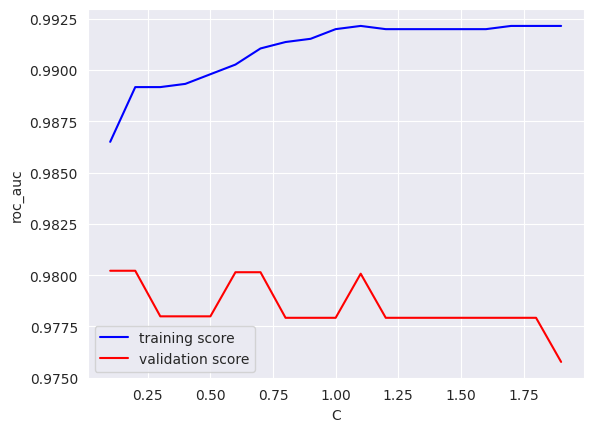

In [78]:
#Validation curve logisticregression for parameter C
prange = np.arange(0,2, 0.1)
trainscore, valscore = validation_curve(lr_tuned, X_train, y_train, param_name='C', param_range=prange, cv=15, scoring='accuracy')
plt.plot(prange, np.mean(trainscore, 1), color='blue', label='training score')
plt.plot(prange, np.mean(valscore, 1), color='red', label='validation score')
plt.legend(loc='best')
plt.xlabel('C')
plt.ylabel('roc_auc')
plt.show()

Here the validation score for parameter C seems to be more randomnly going up and down. Maybe having a range with smaller steps in tuning works better next time.

In [79]:
from sklearn.metrics import RocCurveDisplay

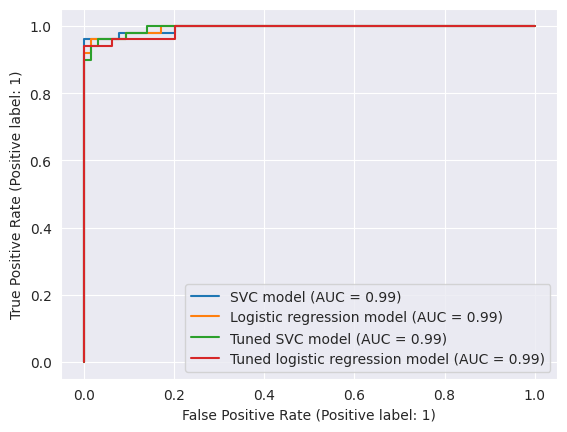

In [80]:
# plt.close()vis our savior (with thanks to Tim and Marshellon)
svc_plot = RocCurveDisplay.from_estimator(svc, X_test, y_test)
plt.close()
svc_tuned_plot = RocCurveDisplay.from_estimator(svc_tuned, X_test, y_test)
plt.close()
lr_plot = RocCurveDisplay.from_estimator(lr, X_test, y_test)
plt.close()
lr_tuned_plot = RocCurveDisplay.from_estimator(lr_tuned, X_test, y_test)
plt.close()

fig, ax = plt.subplots()
svc_plot.plot(ax=ax, name='SVC model')
lr_plot.plot(ax=ax, name='Logistic regression model')
svc_tuned_plot.plot(ax=ax, name ="Tuned SVC model")
lr_tuned_plot.plot(ax=ax, name='Tuned logistic regression model')
plt.show()

In the end the roc auc scores seem to practically be the same 0.99, which is very good. The default models are apparently already good at predicting the class of an object and changing the parameters and tuning for a better score, does not seem to be necessary here. (It was done, to check what different parameters have what kind of influence)